In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_excel("http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls")

                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


C:\Users\thass\AppData\Local\Temp\ipykernel_11100\1934120859.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean()


<Axes: xlabel='Mileage'>

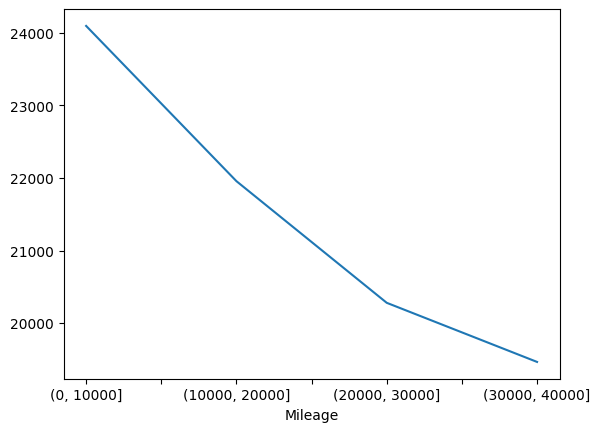

In [12]:
%matplotlib inline
df1 = df[['Mileage','Price']] # df com distancia percorrida e preço
bins = np.arange(0,50000,10000) # array de 0 a 50000 com passo de 10000 
groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean() #agrupados por distancia e preços
print(groups.head())
groups['Price'].plot.line()


In [40]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = df[['Mileage', 'Cylinder', 'Doors']] 
y = df['Price']

#padroniza as colunas selecionadas de X
x[['Mileage', 'Cylinder', 'Doors']] = scaler.fit_transform(x[['Mileage', 'Cylinder', 'Doors']])

# adiciona uma constante 
x = sm.add_constant(x)

print(x)

# cria um modelo de regressão linear OLS usando os dados y e x

est = sm.OLS(y,x).fit()

print(est.summary())

     const   Mileage  Cylinder     Doors
0      1.0 -1.417485   0.52741  0.556279
1      1.0 -1.305902   0.52741  0.556279
2      1.0 -0.810128   0.52741  0.556279
3      1.0 -0.426058   0.52741  0.556279
4      1.0  0.000008   0.52741  0.556279
..     ...       ...       ...       ...
799    1.0 -0.439853   0.52741  0.556279
800    1.0 -0.089966   0.52741  0.556279
801    1.0  0.079605   0.52741  0.556279
802    1.0  0.750446   0.52741  0.556279
803    1.0  1.932565   0.52741  0.556279

[804 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Sat, 17 Aug 2024   Prob (F-statistic):           3.95e-77
Time:                        23:17:41   Log-Likelihood:                -8356.7
No. Observ

C:\Users\thass\AppData\Local\Temp\ipykernel_11100\2851869123.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['Mileage', 'Cylinder', 'Doors']] = scaler.fit_transform(x[['Mileage', 'Cylinder', 'Doors']])


In [18]:
y.groupby(df.Doors).mean() # como a qtd de portas influencia o preco

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

In [41]:


# escala os novos dados (45000, 8, 4) usando o mesmo scaler ajustado
scaled = scaler.transform([[45000, 8, 4]]) 

scaled= np.insert(scaled[0], 0, 1)

print(scaled)

# usa o modelo ajustado para prever o preço com base nos novos dados escalados
predicted = est.predict(scaled)

print(predicted)

#o primeiro array representa as características padronizadas do carro que foram usadas para fazer a previsão
#o segundo array é o resultado da previsão do modelo de regressão linear indicando o preço estimado do carro 

[1.         3.07256589 1.96971667 0.55627894]
[27658.15707316]


c:\Users\thass\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
